In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
lpd=pd.read_csv("~/Downloads/loan_approval_dataset.csv")

In [3]:
lpd.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [4]:
lpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
lpd.columns=lpd.columns.str.strip()
lpd['loan_status']=lpd['loan_status'].str.strip()

In [6]:
len(lpd[lpd['loan_status']=='Approved'])/lpd.shape[0]*100

62.215975638322796

In [7]:
lpd['loan_status'].value_counts()['Rejected']/lpd.shape[0]*100

37.78402436167721

In [8]:
print(lpd.isnull().sum())

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [9]:
lpd['education'].value_counts()
lpd['self_employed'].value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
lpd['education']=encoder.fit_transform(lpd['education'])

In [11]:
lpd['self_employed']=encoder.fit_transform(lpd['self_employed'])

In [12]:
lpd.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,0,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,0,1,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,1,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


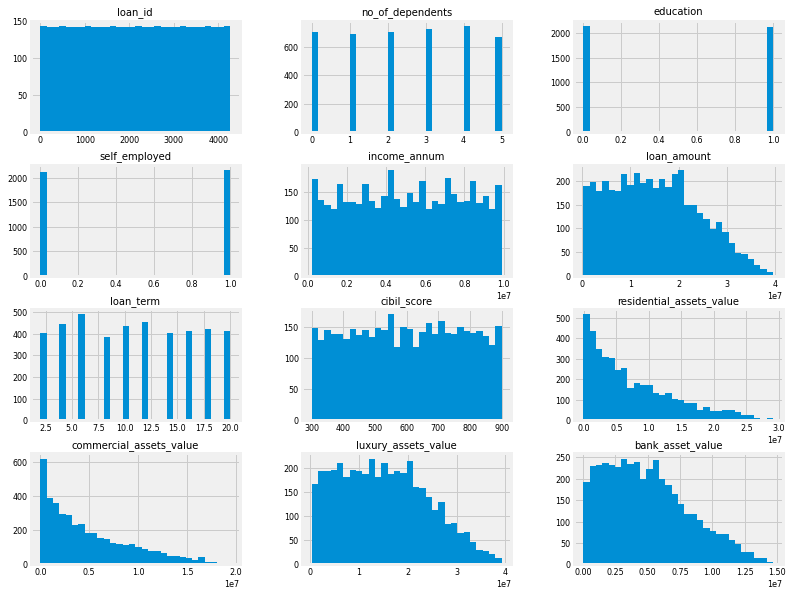

In [13]:
plt.style.use("fivethirtyeight")
plt.rc('font',size=12)
plt.rc('axes',labelsize=12,titlesize=10)
plt.rc('legend',fontsize=8)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
lpd.hist(bins=30,figsize=(12,10))
plt.show()
       

In [14]:
lpd['loan_status']=encoder.fit_transform(lpd['loan_status'])

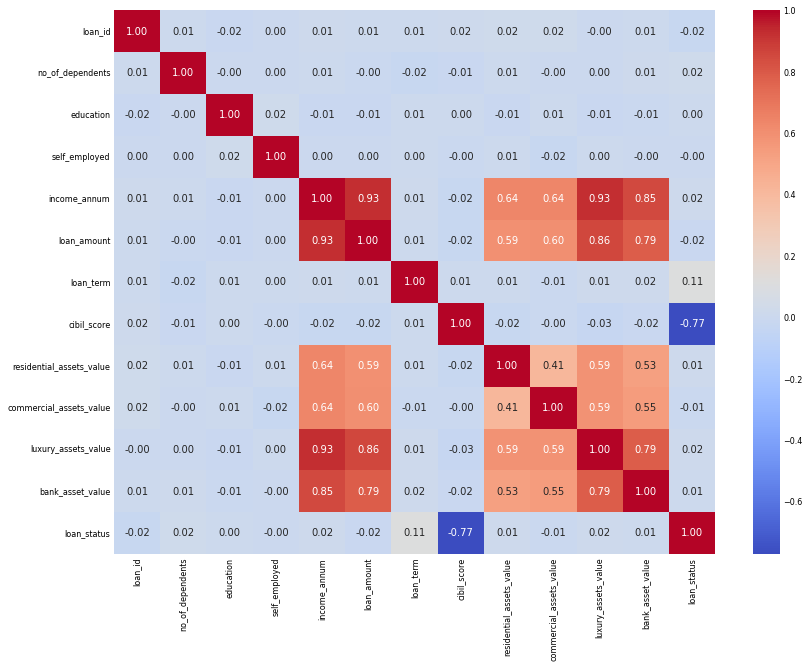

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(lpd.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

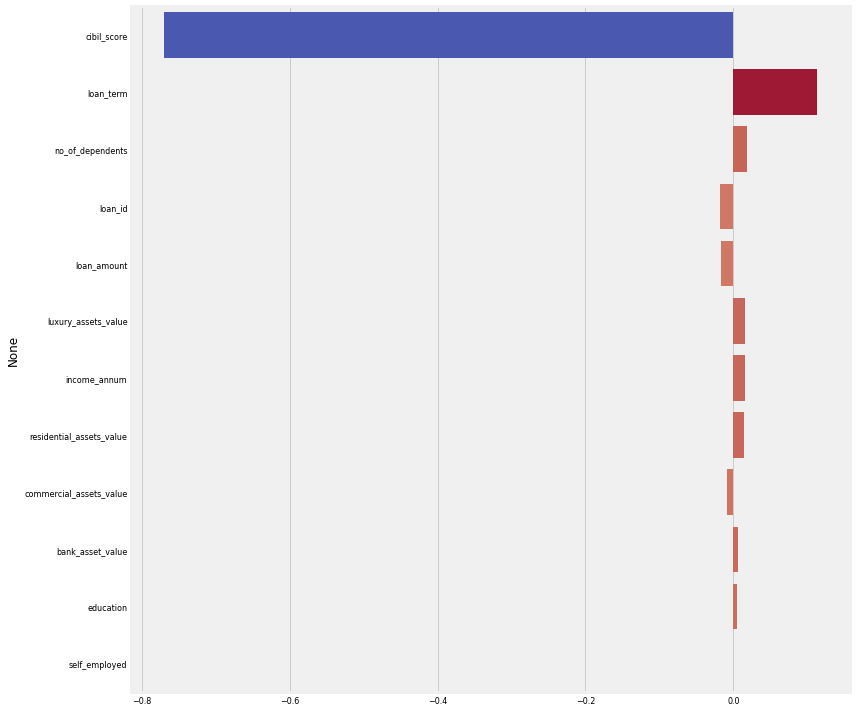

In [16]:
target_var=lpd.corr()['loan_status']
target_var=target_var.sort_values(key=abs,ascending=False).drop('loan_status')
plt.figure(figsize=(12,10))
sns.barplot(x=target_var.values,y=target_var.index,hue=target_var.values,palette='coolwarm',legend=False)
plt.tight_layout()
plt.show()

In [17]:
y=lpd['loan_status']
x=lpd.drop(['loan_id','loan_status'],axis=1)


In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=78)

In [19]:
skewed_cols=['income_annum','loan_amount','residential_assets_value','commercial_assets_value',
            'luxury_assets_value','bank_asset_value']
def get_train_limits(lpd,columns):
    limits={}
    for col in columns:
        temp_log=np.log(lpd[col].clip(lower=1))
        Q1,Q3=temp_log.quantile([0.25,0.75])
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        limits[col]={'lower':lower,'upper':upper}
    return limits

train_limits=get_train_limits(train_x,skewed_cols)
    

In [20]:
def apply_preprocessing(lpd,columns,limits):
    lpd_new=lpd.copy()
    for col in columns:
        lpd_new[f'{col}_log']=np.log(lpd_new[col].clip(lower=1))
        lower=limits[col]['lower']
        upper=limits[col]['upper']
        lpd_new[f'{col}_log']=lpd_new[f'{col}_log'].clip(lower=lower,upper=upper)
        lpd_new=lpd.drop(columns=[col])
    return lpd_new

In [21]:
train_x_final=apply_preprocessing(train_x,skewed_cols,train_limits)

In [22]:
test_x_final=apply_preprocessing(test_x,skewed_cols,train_limits)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_train_x_new=scaler.fit_transform(train_x_final)

In [24]:
scale_test_x_new=scaler.transform(test_x_final)

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
lpd_model=model.fit(scale_train_x_new,train_y)

In [26]:
pred_y=lpd_model.predict(scale_test_x_new)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       651
           1       0.90      0.89      0.90       417

    accuracy                           0.92      1068
   macro avg       0.92      0.91      0.92      1068
weighted avg       0.92      0.92      0.92      1068



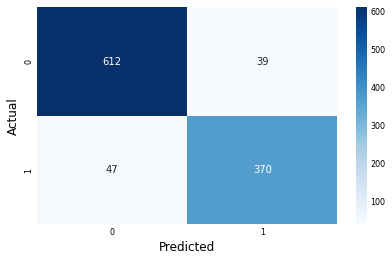

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,pred_y)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

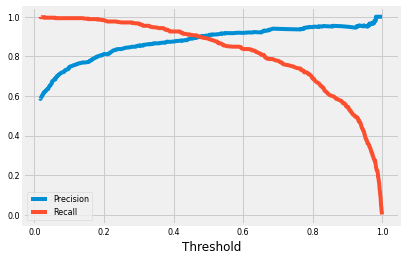

In [29]:
from sklearn.metrics import precision_recall_curve
y_prob=lpd_model.predict_proba(scale_test_x_new)[:,1]
precision,recall,thresholds=precision_recall_curve(test_y,y_prob)
plt.plot(thresholds,precision[:-1],label="Precision")
plt.plot(thresholds,recall[:-1],label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(lpd_model,scale_train_x_new,train_y,cv=5,scoring='roc_auc')
print('CV AUC Scores:',cv_scores)
print('Mean AUC:',cv_scores.mean())

CV AUC Scores: [0.97811721 0.95898329 0.96580724 0.97232859 0.95658344]
Mean AUC: 0.9663639541314077


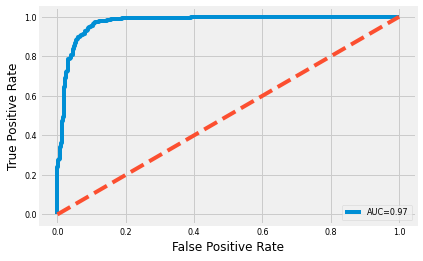

In [31]:
from sklearn.metrics import roc_auc_score,roc_curve
auc=roc_auc_score(test_y,y_prob)
fpr,tpr,_=roc_curve(test_y,y_prob)
plt.plot(fpr,tpr,label=f"AUC={auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [32]:
import joblib
joblib.dump(lpd_model,"loan_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [33]:
def predict_loan(input_data):
    model=joblib.load("loan_model.pkl")
    scaler=joblib.model("scaler.pkl")

    scaled=scaler.transform([input_data])
    prob=model.predict_proba(scaled)[0][1]
    decision="Approved" if prob>=best_threshold else "Rejected"

    return decision,prob

In [35]:
custom_threshold=0.65
preds=(y_prob>=custom_threshold).astype(int)

In [36]:
def confidence_band(prob):
    if prob<0.55:
        return"Low Confidence(High Risk)"
    elif prob<0.70:
        return"Medium Confidence(review needed)"
    else:
        return"High Confidence(Low Risk)"

In [37]:
def expected_loss(prob_default,loan_amount,lgd=0.6):
    return prob_default*loan_amount*lgd


In [63]:
def predict_loan(
    no_of_dependents,
    education,
    self_employed,
    income_annum,
    loan_amount,
    loan_term,
    cibil_score,
    residential_assets_value,
    commercial_assets_value,
    luxury_assets_value,
    bank_asset_value
):
    no_of_dependents=0
    education=1
    self_employed=0
    residential_assets_value=0
    commercial_assets_value=0
    luxury_assets_value=0
    bank_asset_value=income_annum*0.2

    input_data=[
        no_of_dependents,
        education,
        self_employed,
        income_annum,
        loan_amount,
        loan_term,
        cibil_score,
        residential_assets_value,
        commercial_assets_value,
        luxury_assets_value,
        bank_asset_value
    ]

    scaled_input=scaler.transform([input_data])
    prob_reject=model.predict_proba(scaled_input)[0][1]
    prob_approve=1-prob_reject

    threshold=0.65
    decision="Approved" if prob_approve>=threshold else "Rejected"

    confidence=confidence_band(prob_approve)
    el=expected_loss(prob_reject,loan_amount)

    return (
        decision,
        round(prob_approve,3),
        confidence,
        f"${int(el):,}")
    

In [64]:
import gradio as gr
interface=gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="Annual Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Loan Term(Yrs"),
        gr.Number(label="CIBIL Score")
    ],
    outputs=[
        gr.Textbox(label="Decision"),
        gr.Number(label="Approval Probability"),
        gr.Textbox(label="Confidence Level"),
        gr.Textbox(label="Expected Loss")
    ],
)       

/opt/anaconda3/lib/python3.8/site-packages/gradio/utils.py:1002: UserWarning: Expected 11 arguments for function <function predict_loan at 0x7ff41372fd30>, received 4.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/gradio/utils.py:1006: UserWarning: Expected at least 11 arguments for function <function predict_loan at 0x7ff41372fd30>, received 4.
  warnings.warn(


In [65]:
interface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


/opt/anaconda3/lib/python3.8/site-packages/gradio/helpers.py:978: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/gradio/queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "/opt/anaconda3/lib/python3.8/site-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "/opt/anaconda3/lib/python3.8/site-packages/gradio/blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "/opt/anaconda3/lib/python3.8/site-packages/gradio/blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/opt/anaconda3/lib/python3.8/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/opt/anaconda3/lib/

In [66]:
pwd

'/Users/abhinavsingh'